<a href="https://colab.research.google.com/github/EsteemTurnsTechy/Oasis-Internship/blob/main/project_2_level_1_marketing_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ifood_df.csv to ifood_df.csv


In [ ]:
df = pd.read_csv("ifood_df.csv")


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv("ifood_df.csv")
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
features = df[[
    'Income',
    'Age',
    'MntWines',
    'MntMeatProducts',
    'NumWebPurchases',
    'NumStorePurchases',
    'NumCatalogPurchases',
    'NumWebVisitsMonth'
]]


In [ ]:
features = features.dropna()


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


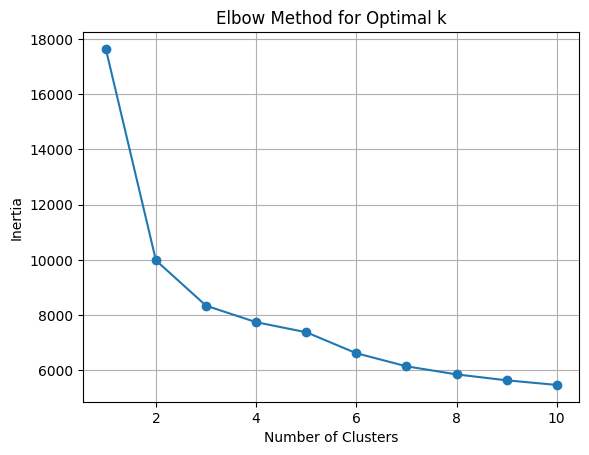

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


In [ ]:
cluster_summary = df.groupby('Cluster')[[
    'Income', 'Age', 'MntWines', 'MntMeatProducts',
    'NumWebPurchases', 'NumStorePurchases'
]].mean()

import pandas as pd
from IPython.display import display
display(cluster_summary)


,Income,Age,MntWines,MntMeatProducts,NumWebPurchases,NumStorePurchases
Cluster,,,,,,
0,77477.316348,50.989384,642.191083,499.078556,4.745223,8.397028
1,34474.845429,48.509896,45.500471,25.117813,2.226202,3.276155
2,60560.315007,55.246657,481.939079,152.744428,6.604755,8.038633


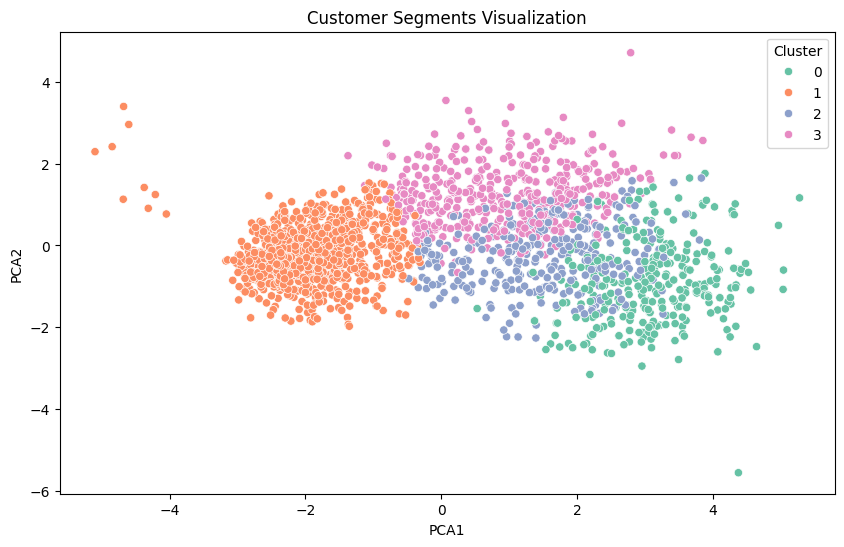

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Customer Segments Visualization")
plt.show()


In [ ]:
df.groupby('Cluster').mean()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,PCA1,PCA2
Cluster,,,,,,,,,,,,,,,,,,,,,
0,77477.316348,0.029724,0.150743,50.864119,642.191083,65.318471,499.078556,96.634820,67.208068,75.409766,...,0.076433,0.000000,0.543524,0.157113,0.222930,1370.430998,1295.021231,0.736730,2.822156,-0.864455
1,34474.845429,0.776626,0.470311,49.042413,45.500471,5.435438,25.117813,8.327992,5.364750,17.557022,...,0.104618,0.049953,0.492931,0.168709,0.183789,89.746466,72.189444,0.086711,-1.889374,-0.175537
2,60560.315007,0.203566,0.812779,47.658247,481.939079,32.224368,152.744428,42.945022,33.389302,63.893016,...,0.075780,0.001486,0.496285,0.164933,0.261516,743.242199,679.349183,0.328380,1.003552,0.881729


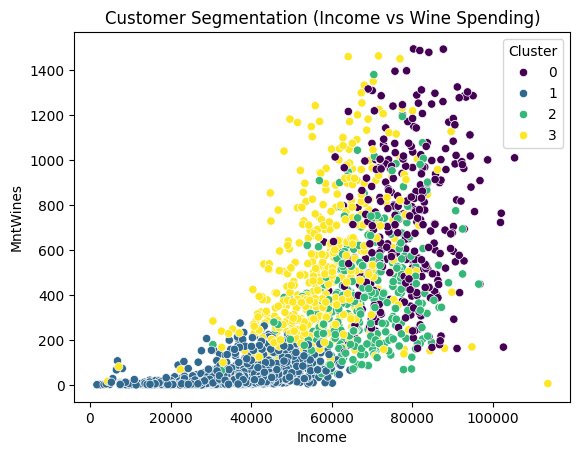

In [ ]:
sns.scatterplot(data=df, x='Income', y='MntWines', hue='Cluster', palette='viridis')
plt.title("Customer Segmentation (Income vs Wine Spending)")
plt.show()
